In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Работа со случайным лесом
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  

# Работа с метриками
from sklearn.feature_selection import chi2 # хи-квадрат
from sklearn.feature_selection import f_classif # anova

# Работам с обработкой естественного языка
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\medol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\medol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\medol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\medol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\medol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\medol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-d

True

In [2]:
hotels = pd.read_csv('hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [3]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [4]:
 # убираем признаки которые еще не успели обработать, 
 # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
 object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
 hotels.drop(object_columns, axis = 1, inplace=True)

 # заполняем пропуски самым простым способом
 hotels = hotels.fillna(0)

In [5]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [6]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [8]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1414588788846763


Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.

In [9]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts','total_number_of_reviews_reviewer_has_given', 'additional_number_of_scoring']

# категориальные признаки
cat_cols = ['average_score', 'lat']

<AxesSubplot:>

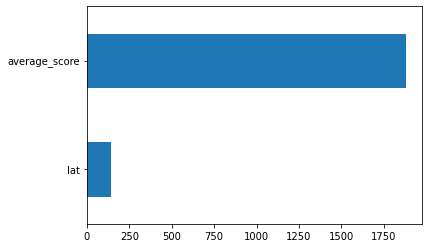

In [10]:
y=y.astype('int')

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot:>

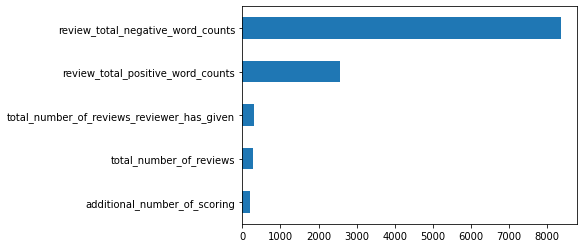

In [11]:
imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

### Очистка данных для улучшения MAPE

In [12]:
hotels2 = pd.read_csv('hotels.csv')
hotels2.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [13]:
#Определяем количество отелей в выборке
hotels2['hotel_name'].nunique()

1492

### Работаем с датами

In [14]:
#Преобразуем дату в подходящий формат
hotels2['review_date'] = pd.to_datetime(hotels2['review_date'], format = '%m/%d/%Y')

In [15]:
hotels2['review_date'].min()

Timestamp('2015-08-04 00:00:00')

In [16]:
hotels2['review_date'].max()

Timestamp('2017-08-03 00:00:00')

In [17]:
hotels2['year'] = hotels2['review_date'].dt.year
hotels2['month'] = hotels2['review_date'].dt.month

## Добавление новых признаков

### Добавление количества ночей

In [18]:
# Пишем функцию которая будет выявлять количество ночей из тэгов
def nights(list):
    tags = []
    for j in (list.split(',')):
        tags.append(j.replace("'","").replace("[","").replace("]","").strip())

    for i in tags:
        if 'Stayed' in i:
            nights = (i[7])
        else:
            nights = 0
    
    return int(nights)
       

In [19]:
hotels2['nights'] = hotels2['tags'].apply(nights)

### Работа с датами

In [20]:
#Преобразуем дату в подходящий формат
hotels2['review_date'] = pd.to_datetime(hotels2['review_date'], format = '%m/%d/%Y')
# добавим столбы для месяца и года
hotels2['year'] = hotels2['review_date'].dt.year
hotels2['month'] = hotels2['review_date'].dt.month

### Работа с NLTK

In [21]:
#!pip install nltk

In [22]:
# создаем колонку со всеми отзывами, которую будем обрабатывать
hotels2['reviews'] = hotels2['negative_review'] + hotels2['positive_review']

In [23]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [24]:
def clean_text(text):
    # приводим к нижнему регистру
    text = text.lower()
    # разделение текста на слова и удаление знаков препинания 
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # удаляем цифры из текста
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # удаляем стоп-слова
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # удаляем пустые токены
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # лемматизация текста
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # удаляем слова из одной буквы
    text = [t for t in text if len(t) > 1]
    # объединяем текст
    text = " ".join(text)
    return(text)

hotels2["reviews_clean"] = hotels2["reviews"].apply(lambda x: clean_text(x))

In [25]:
hotels2["reviews_clean"]

0                                         leave staff amaze
1                                   poor breakfast location
2                                      kettle room positive
3         negative friendly staff quiet comfortable room...
4         torn sheet staff friendly helpful breakfast ex...
                                ...                        
386798               negative tr proche du metro earl court
386799    negative bed comfy stay boyfriend double bed a...
386800    room really small guess normal london great lo...
386801                          negative location comfy bed
386802    patio outside could clean algae give uplifting...
Name: reviews_clean, Length: 386803, dtype: object

In [26]:
# анализ тональности (настроения) текста отзыва
sid = SentimentIntensityAnalyzer()
hotels2["sentiments"] = hotels2["reviews"].apply(lambda x: sid.polarity_scores(x))
hotels2 = pd.concat([hotels2.drop(['sentiments'], axis=1), hotels2['sentiments'].apply(pd.Series)], axis=1)

In [27]:
hotels2.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,lng,year,month,nights,reviews,reviews_clean,neg,neu,pos,compound
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,-0.143671,2016,2,0,Leaving Staff were amazing,leave staff amaze,0.000,0.441,0.559,0.5859
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,-0.123097,2017,1,1,poor breakfast location,poor breakfast location,0.608,0.392,0.000,-0.4767
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,2.325643,2016,10,0,No kettle in room No Positive,kettle room positive,0.400,0.273,0.327,0.0516
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,2.394540,2015,9,1,No Negative Friendly staff quiet comfortable r...,negative friendly staff quiet comfortable room...,0.248,0.210,0.542,0.7906
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,4.847060,2016,3,6,Torn sheets The staff was very friendly and ...,torn sheet staff friendly helpful breakfast ex...,0.073,0.587,0.340,0.8051


### Создаем модель

In [28]:
 # убираем признаки которые еще не успели обработать, 
 # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
 object_columns = [s for s in hotels2.columns if hotels2[s].dtypes == 'object']
 hotels2.drop(object_columns, axis = 1, inplace=True)

 # заполняем пропуски самым простым способом
 hotels2 = hotels2.fillna(0)
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels2.drop(['reviewer_score'], axis = 1)  
y = hotels2['reviewer_score'] 


In [29]:
X = X.drop(['review_date'], axis = 1)  

In [30]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12800732533897732
